In [1]:
from __future__ import  print_function
import igraph as ig
import cairocffi as cairo
import numpy as np
np.set_printoptions(linewidth=175)
ig.__version__ 

'0.7.1'

In [2]:
g = ig.Graph() 
print(g)

IGRAPH U--- 0 0 --


In [3]:
g.add_vertices(3)
print(g) 

IGRAPH U--- 3 0 --


In [4]:
 g.add_edges([(0,1), (1,2)])
print(g) 

IGRAPH U--- 3 2 --
+ edges:
0--1 1--2


In [5]:
g.add_edges([(2,0)])
g.add_vertices(3)
g.add_edges([(2,3),(3,4),(4,5),(5,3)]) 
print(g)

IGRAPH U--- 6 7 --
+ edges:
0--1 1--2 0--2 2--3 3--4 4--5 3--5


In [6]:
g = ig.Graph([(0,1), (0,2), (2,3), (3,4), (4,2), (2,5), (5,0), (6,3), (5,6)]) 
print(g)

IGRAPH U--- 7 9 --
+ edges:
0 -- 1 2 5     2 -- 0 3 4 5   4 -- 2 3       6 -- 3 5
1 -- 0         3 -- 2 4 6     5 -- 0 2 6


In [7]:
print(*g.vs, sep='\n')

igraph.Vertex(<igraph.Graph object at 0x7f7ef0117c78>, 0, {})
igraph.Vertex(<igraph.Graph object at 0x7f7ef0117c78>, 1, {})
igraph.Vertex(<igraph.Graph object at 0x7f7ef0117c78>, 2, {})
igraph.Vertex(<igraph.Graph object at 0x7f7ef0117c78>, 3, {})
igraph.Vertex(<igraph.Graph object at 0x7f7ef0117c78>, 4, {})
igraph.Vertex(<igraph.Graph object at 0x7f7ef0117c78>, 5, {})
igraph.Vertex(<igraph.Graph object at 0x7f7ef0117c78>, 6, {})


In [8]:
g.vs["name"] = ["Alice", "Bob", "Claire", "Dennis", "Esther", "Frank", "George"] 
g.vs["age"] = [25, 31, 18, 47, 22, 23, 50]
g.vs["gender"] = ["f", "m", "f", "m", "f", "m", "m"]
g.es["is_formal"] = [False, False, True, True, True, False, True, False, False] 

In [9]:
print(*g.vs, sep='\n') 

igraph.Vertex(<igraph.Graph object at 0x7f7ef0117c78>, 0, {'name': 'Alice', 'age': 25, 'gender': 'f'})
igraph.Vertex(<igraph.Graph object at 0x7f7ef0117c78>, 1, {'name': 'Bob', 'age': 31, 'gender': 'm'})
igraph.Vertex(<igraph.Graph object at 0x7f7ef0117c78>, 2, {'name': 'Claire', 'age': 18, 'gender': 'f'})
igraph.Vertex(<igraph.Graph object at 0x7f7ef0117c78>, 3, {'name': 'Dennis', 'age': 47, 'gender': 'm'})
igraph.Vertex(<igraph.Graph object at 0x7f7ef0117c78>, 4, {'name': 'Esther', 'age': 22, 'gender': 'f'})
igraph.Vertex(<igraph.Graph object at 0x7f7ef0117c78>, 5, {'name': 'Frank', 'age': 23, 'gender': 'm'})
igraph.Vertex(<igraph.Graph object at 0x7f7ef0117c78>, 6, {'name': 'George', 'age': 50, 'gender': 'm'})


In [10]:
g.es[0].attributes() 

{'is_formal': False}

In [11]:
g.vs.find(name='Claire')

igraph.Vertex(<igraph.Graph object at 0x7f7ef0117c78>, 2, {'name': 'Claire', 'age': 18, 'gender': 'f'})

In [12]:
print(*g.layout_fruchterman_reingold(), sep='\n')

[4.265716875270348, 3.802842877126633]
[6.690302314843024, 2.609857796113482]
[3.6366221366413005, 6.756892152004591]
[1.739852328849275, 8.86926868301502]
[4.428269878174149, 9.581757386547146]
[1.522893311535566, 4.6057681312221455]
[-0.5037543197725075, 6.751149202086129]


In [13]:
layout = g.layout_kamada_kawai() 

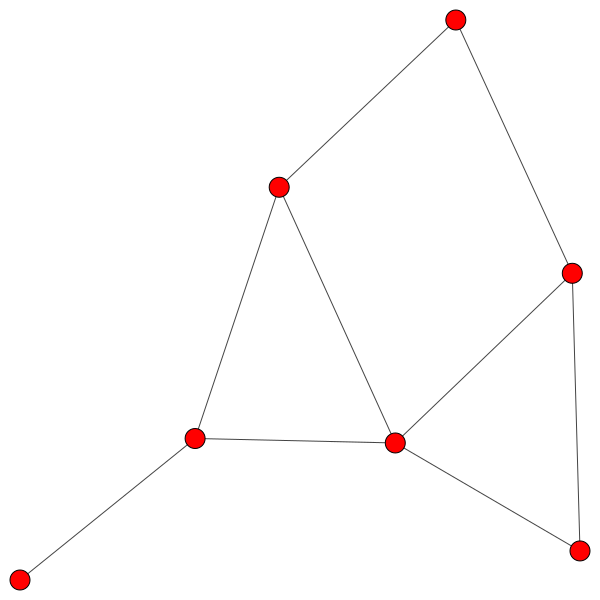

In [14]:
ig.plot(g, layout=layout) 

In [15]:
g.vs['label'] = g.vs['name']
color_dict = {"m": "blue", "f": "pink"} 
g.vs["color"] = [color_dict[gender] for gender in g.vs["gender"]]  

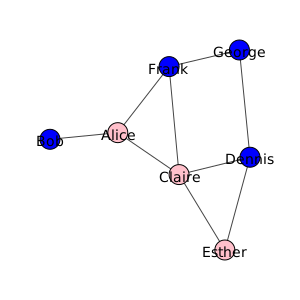

In [16]:
ig.plot(g, 'test4.pdf', layout=layout, margin=50, label=g.vs['name'], bbox=(300, 300))

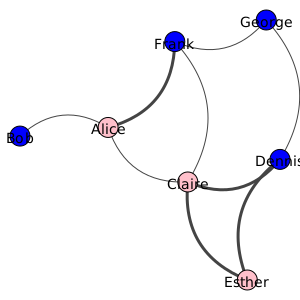

In [17]:
visual_style = {}
visual_style["vertex_size"] = 20
visual_style["vertex_color"] = [color_dict[gender] for gender in g.vs["gender"]]
visual_style["vertex_label"] = g.vs["name"]
visual_style["edge_width"] = [1 + 2 * int(is_formal) for is_formal in g.es["is_formal"]]
visual_style["layout"] = layout
visual_style["bbox"] = (300, 300)
visual_style["margin"] = 20
visual_style["edge_curved"] = True
ig.plot(g, **visual_style)

In [18]:
n = 10
p = 0.80
np.random.seed(42)
adjmat = np.random.rand(n, n)
adjmat[np.random.rand(n, n) < p] = 0
np.fill_diagonal(adjmat, 0) 
adjmat = np.round(50*adjmat)
print(adjmat)

g = ig.Graph.Adjacency((adjmat > 0).tolist(), mode=ig.ADJ_DIRECTED)
g.vs['label'] = ['u%.2d' % i for i in range(n)] 
g.es['weight'] = adjmat[adjmat.nonzero()]

[[  0.   0.   0.   0.   8.   0.   0.   0.   0.   0.]
 [  0.   0.  42.  11.   0.   9.  15.   0.  22.   0.]
 [ 31.   7.   0.   0.   0.   0.  10.  26.   0.   0.]
 [  0.   0.   0.   0.  48.   0.   0.   0.   0.  22.]
 [  6.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 48.   0.   0.   0.  30.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.  27.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  18.   0.]
 [  0.   0.  17.   3.   0.   0.  36.   0.   0.   0.]
 [  0.  36.  38.   0.   0.   0.   0.  21.   1.   0.]]


In [19]:
print(*g.vs, sep='\n')

igraph.Vertex(<igraph.Graph object at 0x7f78fc0cf9a8>, 0, {'label': 'u00'})
igraph.Vertex(<igraph.Graph object at 0x7f78fc0cf9a8>, 1, {'label': 'u01'})
igraph.Vertex(<igraph.Graph object at 0x7f78fc0cf9a8>, 2, {'label': 'u02'})
igraph.Vertex(<igraph.Graph object at 0x7f78fc0cf9a8>, 3, {'label': 'u03'})
igraph.Vertex(<igraph.Graph object at 0x7f78fc0cf9a8>, 4, {'label': 'u04'})
igraph.Vertex(<igraph.Graph object at 0x7f78fc0cf9a8>, 5, {'label': 'u05'})
igraph.Vertex(<igraph.Graph object at 0x7f78fc0cf9a8>, 6, {'label': 'u06'})
igraph.Vertex(<igraph.Graph object at 0x7f78fc0cf9a8>, 7, {'label': 'u07'})
igraph.Vertex(<igraph.Graph object at 0x7f78fc0cf9a8>, 8, {'label': 'u08'})
igraph.Vertex(<igraph.Graph object at 0x7f78fc0cf9a8>, 9, {'label': 'u09'})


In [20]:
print(*g.es, sep='\n')

igraph.Edge(<igraph.Graph object at 0x7f78fc0cf9a8>, 0, {'weight': 8.0})
igraph.Edge(<igraph.Graph object at 0x7f78fc0cf9a8>, 1, {'weight': 42.0})
igraph.Edge(<igraph.Graph object at 0x7f78fc0cf9a8>, 2, {'weight': 11.0})
igraph.Edge(<igraph.Graph object at 0x7f78fc0cf9a8>, 3, {'weight': 9.0})
igraph.Edge(<igraph.Graph object at 0x7f78fc0cf9a8>, 4, {'weight': 15.0})
igraph.Edge(<igraph.Graph object at 0x7f78fc0cf9a8>, 5, {'weight': 22.0})
igraph.Edge(<igraph.Graph object at 0x7f78fc0cf9a8>, 6, {'weight': 31.0})
igraph.Edge(<igraph.Graph object at 0x7f78fc0cf9a8>, 7, {'weight': 7.0})
igraph.Edge(<igraph.Graph object at 0x7f78fc0cf9a8>, 8, {'weight': 10.0})
igraph.Edge(<igraph.Graph object at 0x7f78fc0cf9a8>, 9, {'weight': 26.0})
igraph.Edge(<igraph.Graph object at 0x7f78fc0cf9a8>, 10, {'weight': 48.0})
igraph.Edge(<igraph.Graph object at 0x7f78fc0cf9a8>, 11, {'weight': 22.0})
igraph.Edge(<igraph.Graph object at 0x7f78fc0cf9a8>, 12, {'weight': 6.0})
igraph.Edge(<igraph.Graph object at 0x7

In [21]:
g.es[0].attributes()


{'weight': 8.0}

In [22]:
layout = g.layout_kamada_kawai() 

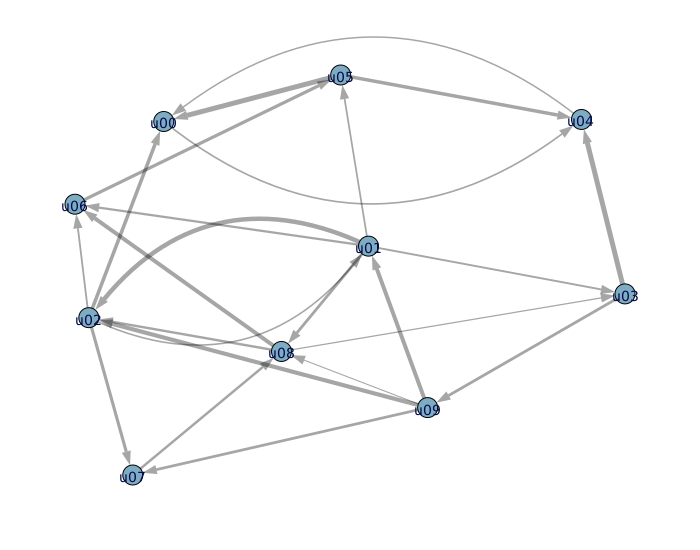

In [23]:
ig.plot(g, 'test5.pdf', layout=layout, bbox=(700, 550),
        edge_width=[1+ 4*wt/max(g.es['weight']) for wt in g.es['weight']], margin=75,
        vertex_color='rgb(126, 172, 194)', vertex_label_dist=0, vertex_label_color='rgb(0, 11, 79)',
        edge_color='rgb(0.2, 0.2, 0.2, 0.35)')

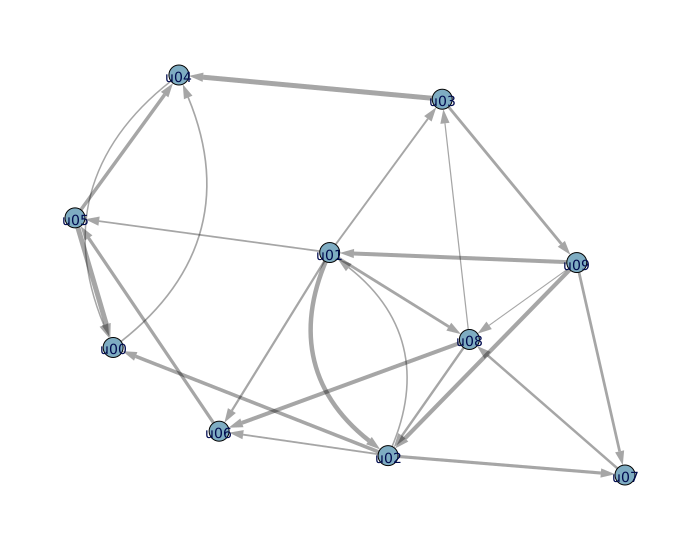

In [43]:
def wrapped_plotter(g, fname, layout):
    return ig.plot(g, fname, layout=layout, bbox=(700, 550),
        edge_width=[1+ 4*wt/max(g.es['weight']) for wt in g.es['weight']], margin=75,
        vertex_color='rgb(126, 172, 194)', vertex_label_dist=0, vertex_label_color='rgb(0, 11, 79)',
        edge_color='rgb(0.2, 0.2, 0.2, 0.35)')
wrapped_plotter(g, 'test7.pdf', list(g.layout_kamada_kawai())) 

In [100]:
def jitter_layout(layout, scale=1/7):
    """Add noise/a jitter to the layout position if the noedes.

    Parameters
    ----------
    layout : layout (nested list)
        list-list with coordinates.
    scale : float, optional
        Scaling factor for how much jutter to add.
        A large scaling factor results in more jitter.

    Returns
    -------
    layout (nested list)
        The jittered layout coordinates.
    """
    layout = np.array(layout)
    layout *= 1.0 + ((np.random.randn(*layout.shape) - 0.5)*scale)
    return layout.tolist()


In [101]:
layout = g.layout_kamada_kawai()

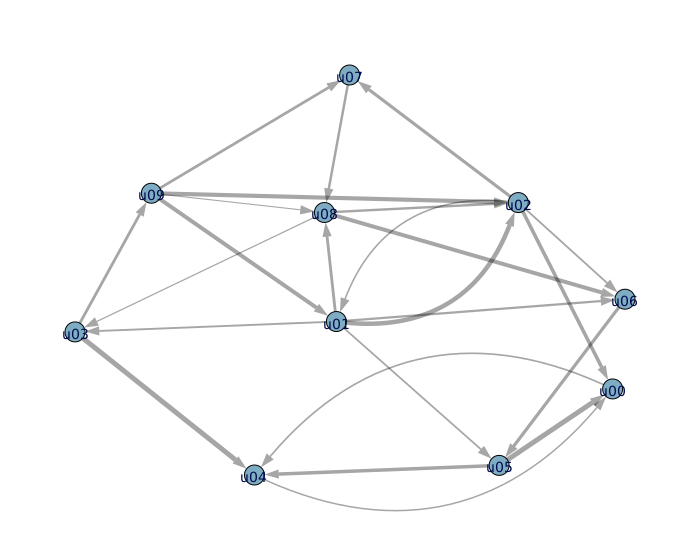

In [103]:
wrapped_plotter(g, 'test8.pdf', layout) 

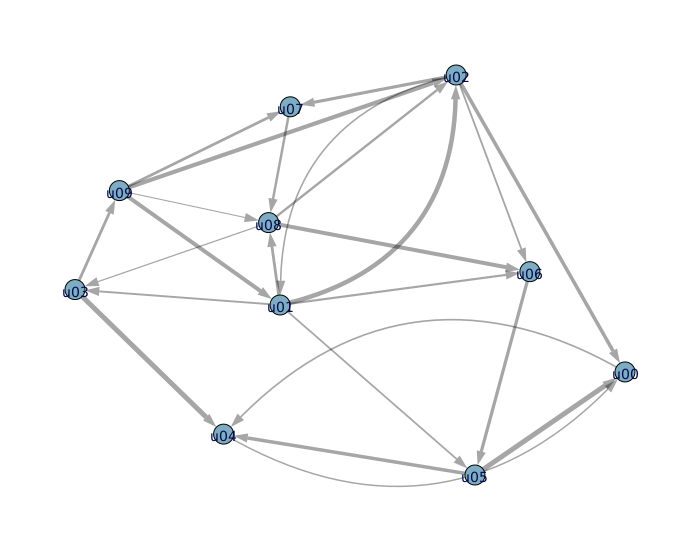

In [106]:
wrapped_plotter(g, 'test8.pdf', jitter_layout(layout, 0.2)) 